## Getting QuTip Down

In [1]:
import qutip as qt
import qutip.states as qts
import qutip.operators as qto
import qutip.states as qts
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import sys
import seaborn as sns
from functools import reduce

sys.path.append("../dwaveutils/dwavetools")
sys.path.append("../dwaveutils/probrep")
from dictrep import DictRep
from dwavetools import (nqubit_1pauli, nqubit_2pauli, loadAandB, dict_to_qutip, make_numeric_schedule,
make_dwaveH)

In [21]:
# Form a dictionary representation of a problem
dictparams = {(0, 0): 0.1, (1, 1): 0.1, (2, 2): 0.1, (0, 1): -0.1, (1, 2): -0.1, (0, 2): -0.1}
problem = DictRep(H = dictparams, qpu = 'simulate', vartype = 'ising', encoding = "logical")
schedule = make_numeric_schedule(1, **{'ta': 1000000})
numericH = make_dwaveH(problem, schedule)
psi0 = numericH[0][0].groundstate()[1]

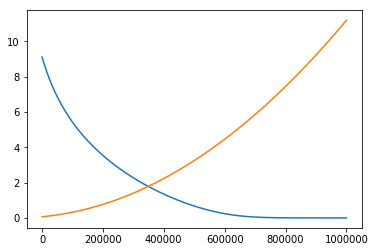

In [22]:
plt.plot(numericH[0][1](schedule[1]))
plt.plot(numericH[1][1](schedule[1]))

In [ ]:
results = qt.mesolve(numericH, psi0, schedule[1])

In [ ]:
amps = np.array([abs(results.states[1][i])**2 for i in range(8)])

<BarContainer object of 8 artists>

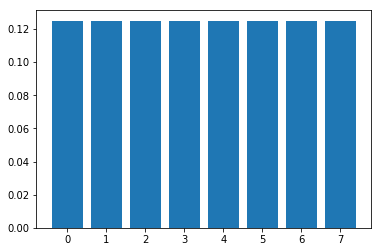

In [20]:
plt.bar([0, 1, 2, 3, 4, 5, 6, 7], amps.flatten())